https://github.com/krishnaik06/mlproject/blob/main/notebook/1%20.%20EDA%20STUDENT%20PERFORMANCE%20.ipynb

https://www.kaggle.com/code/ayahazem6103/students-performance-in-exams-eda

https://www.kaggle.com/code/amirhoushang73/eda-of-students-performance-in-exams

https://github.com/AnshulSaini17/Income_evaluation/blob/main/Income_Evalutation.ipynb

### Student Performance Indicator

`Life cycle of Machine learning Project`

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
- In this project I will predict `writing score` base on the other variables.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### import required library

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [2]:
# Load the data

file_path = Path(r"D:\Data Science\Machine Learning2\End-To-End-ML-Project\artifacts\data_ingestion\data\stud.csv")
file_path

df = pd.read_csv(file_path)

In [3]:
# Top five rows

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# check the shape
df.shape

(1000, 8)

In [5]:
# let's see the all information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check various categories present in the different categorical column

In [6]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [7]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [8]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [9]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [10]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

### Dataset Information

#### In this dataset there are five categorical columns and three numerical columns

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1) Check Missing Values

In [11]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Interpretation: There is no missing values in the dataset

### 3.2) Check Duplicates value

In [12]:
df.duplicated().sum()

0

#### Interpretation: There is no duplicate values in the datset

### 3.3) Check data type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Check the number of unique values of each column

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5) Check statistics of data set

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading more higher = 17

### EDA -> Explority Data Analysis

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [28]:
# define numerical & categorical columns
numerical_features = df.select_dtypes(include=['int64']).columns.to_list()

categorical_feautes = df.select_dtypes(include=['object']).columns.to_list()

In [29]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [30]:
categorical_feautes

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Adding columns for "Total Score" and "Average"

In [31]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']

df['average_score'] = df['total_score'] / 3

In [32]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [34]:
df.describe()

,math_score,reading_score,writing_score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [43]:
# Find the number of student those are got full mark in math, reading and writing socre

# reading_full = df[df['reading_score'] == 100].count()

reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Maths: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Maths: 7


In [45]:
# Find those student those are got less or equal 20 mark in reading, writing and math score

reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Maths: 4


`Insights:`
- From above information we get students have performed the worst in Maths
- Best performance is in reading section

### Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

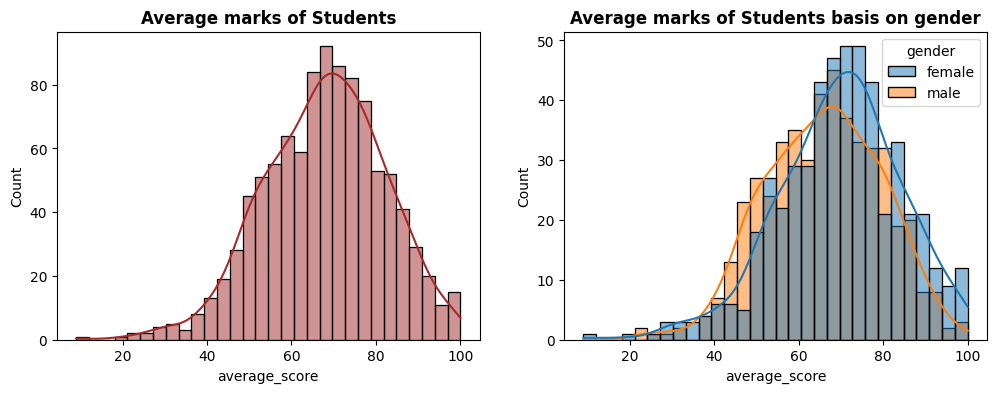

In [51]:
# Histogram & KDE

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
plt.subplot(1,2,1)
plt.title(label="Average marks of Students", fontweight="bold")
sns.histplot(data=df, x="average_score", bins=30, kde=True, color="brown")

plt.subplot(1,2,2)
plt.title(label="Average marks of Students basis on gender", fontweight="bold")
sns.histplot(data=df, x="average_score", hue="gender", bins=30, kde=True)

plt.show()

`Insights`:
 - Female average mark is higher than male

### Visualize total score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

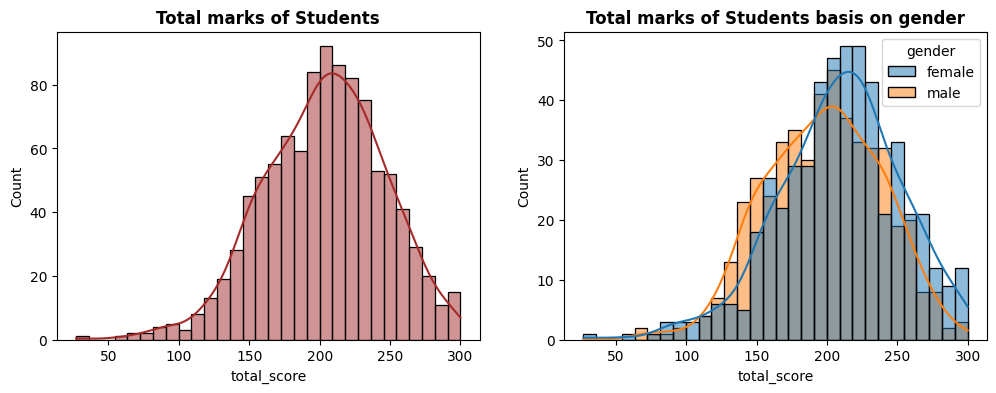

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
plt.subplot(1,2,1)
plt.title(label="Total marks of Students", fontweight="bold")
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="brown")

plt.subplot(1,2,2)
plt.title(label="Total marks of Students basis on gender", fontweight="bold")
sns.histplot(data=df, x="total_score", hue="gender", bins=30, kde=True)

plt.show()

`Insights`:
 - Female Total mark is higher than male
 - Female students tend to perform well then male students.

### Visualize average score distribution basis on lunch to make some conclusion

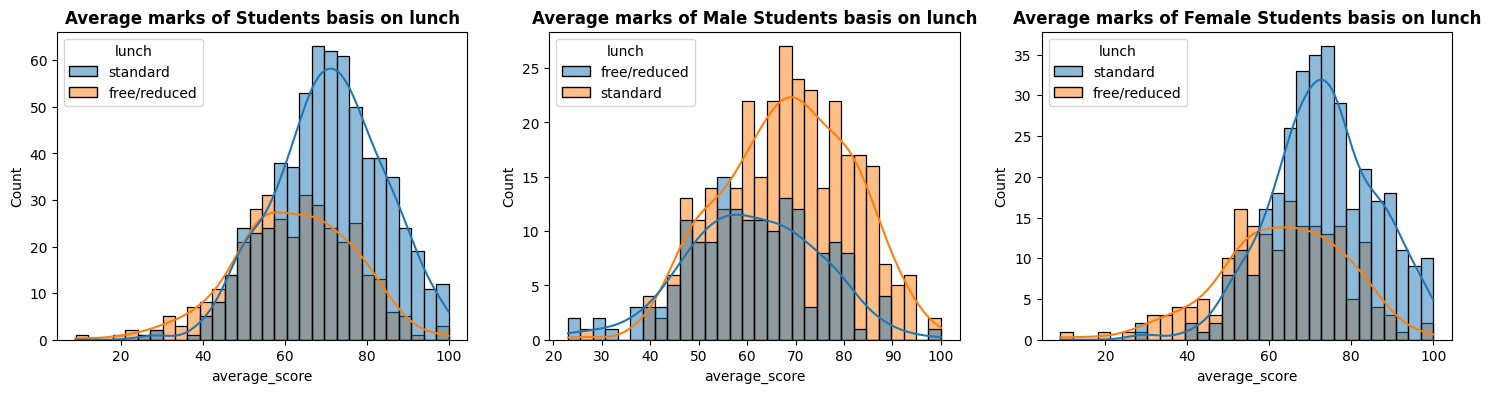

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

plt.subplot(1,3,1)
plt.title(label="Average marks of Students basis on lunch", fontweight="bold")
sns.histplot(data=df, x="average_score", hue="lunch", bins=30, kde=True, color="brown")

plt.subplot(1,3,2)
plt.title(label="Average marks of Male Students basis on lunch", fontweight="bold")
sns.histplot(data=df[df['gender'] == 'male'], x="average_score", hue="lunch", bins=30, kde=True)

plt.subplot(1,3,3)
plt.title(label="Average marks of Female Students basis on lunch", fontweight="bold")
sns.histplot(data=df[df['gender'] == 'female'], x="average_score", hue="lunch", bins=30, kde=True)

plt.show()

`Insights:`
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

### Visualize average score distribution basis on parental level of education to make some conclusion

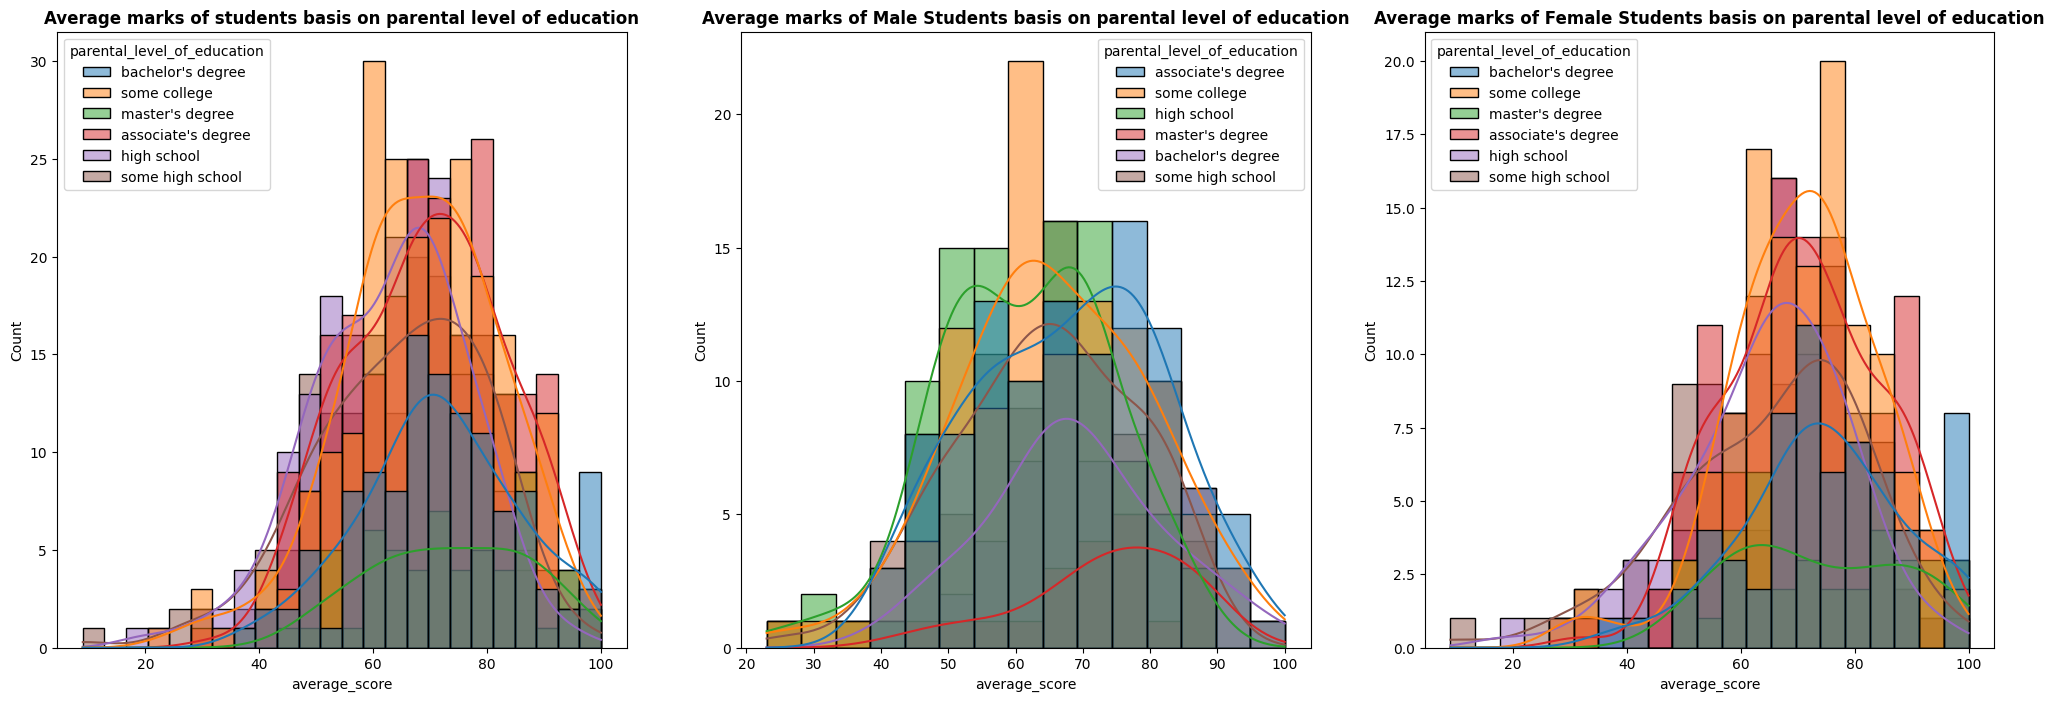

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

plt.subplot(1,3,1)
plt.title(label="Average marks of students basis on parental level of education", fontweight="bold")
sns.histplot(data=df, x="average_score", hue="parental_level_of_education", kde=True, color="brown")

plt.subplot(1,3,2)
plt.title(label="Average marks of Male Students basis on parental level of education", fontweight="bold")
sns.histplot(data=df[df['gender'] == 'male'], x="average_score", hue="parental_level_of_education", kde=True)

plt.subplot(1,3,3)
plt.title(label="Average marks of Female Students basis on parental level of education", fontweight="bold")
sns.histplot(data=df[df['gender'] == 'female'], x="average_score", hue="parental_level_of_education", kde=True)

plt.show()

Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

### Visualize average score distribution basis on race_ethnicity to make some conclusion

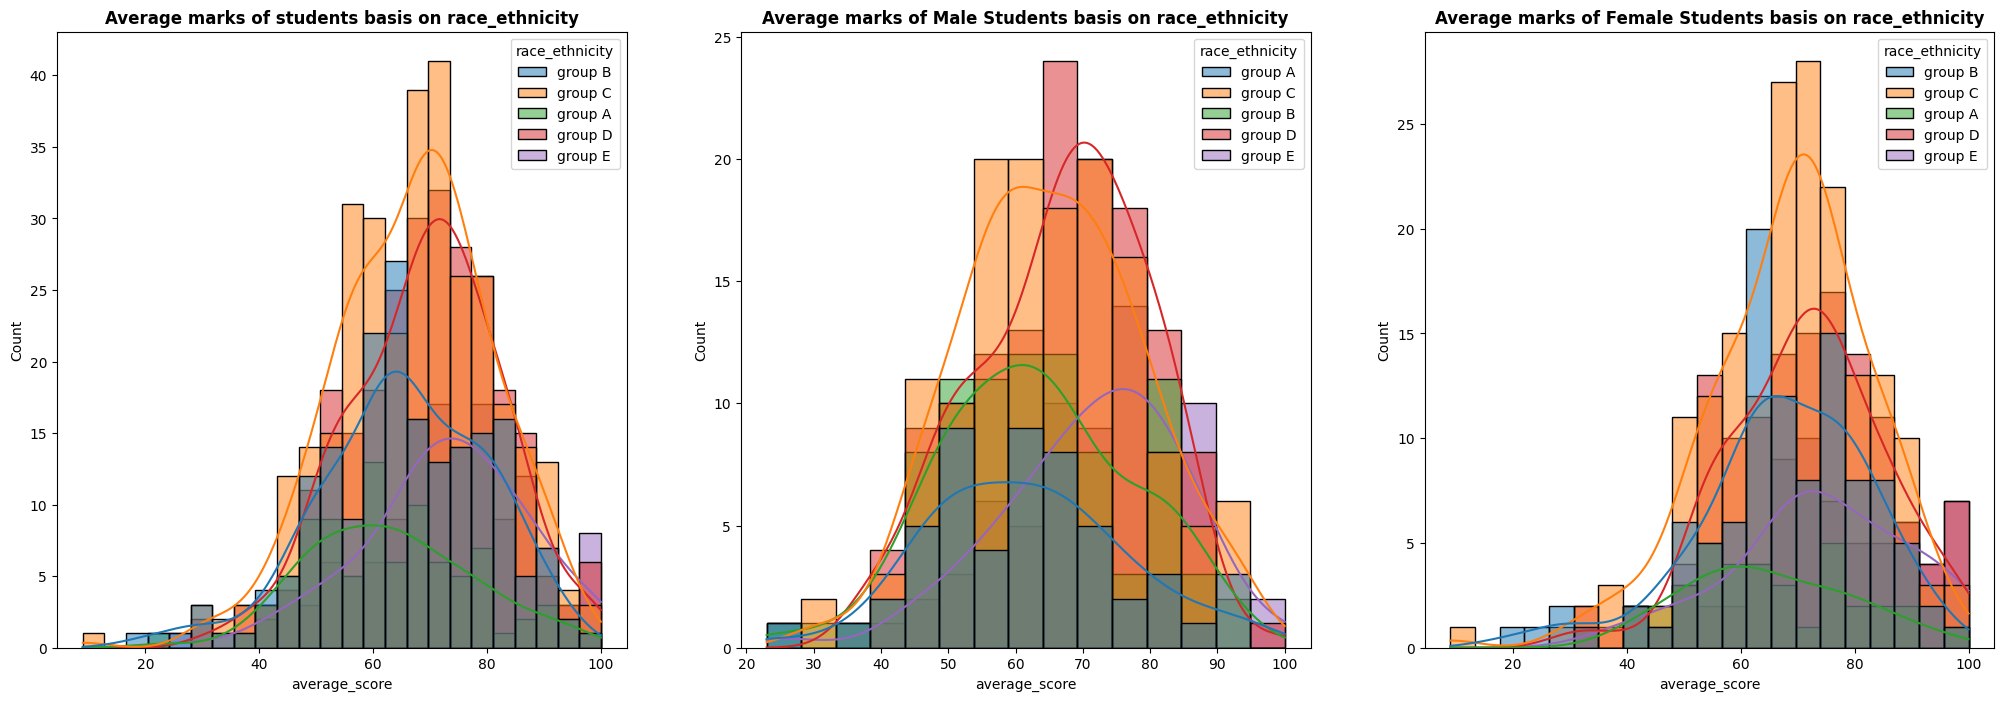

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

plt.subplot(1,3,1)
plt.title(label="Average marks of students basis on race_ethnicity", fontweight="bold")
sns.histplot(data=df, x="average_score", hue="race_ethnicity", kde=True, color="brown")

plt.subplot(1,3,2)
plt.title(label="Average marks of Male Students basis on race_ethnicity", fontweight="bold")
sns.histplot(data=df[df['gender'] == 'male'], x="average_score", hue="race_ethnicity", kde=True)

plt.subplot(1,3,3)
plt.title(label="Average marks of Female Students basis on race_ethnicity", fontweight="bold")
sns.histplot(data=df[df['gender'] == 'female'], x="average_score", hue="race_ethnicity", kde=True)

plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximumum score of students in all three subjects

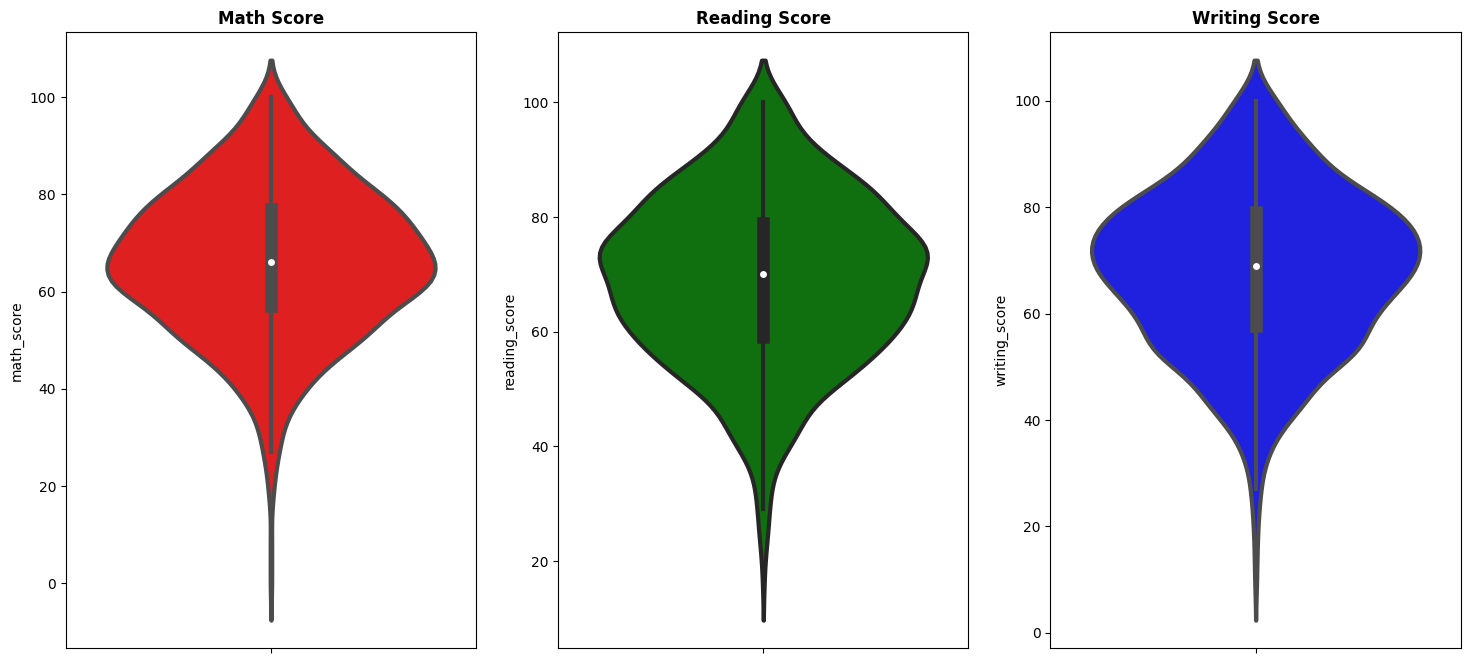

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

plt.subplot(1,3,1)
plt.title(label="Math Score", fontweight="bold")
sns.violinplot(data=df, y='math_score', color='red', linewidth=3)

plt.subplot(1,3,2)
plt.title(label="Reading Score", fontweight="bold")
sns.violinplot(data=df, y='reading_score', color='green', linewidth=3)

plt.subplot(1,3,3)
plt.title(label="Writing Score", fontweight="bold")
sns.violinplot(data=df, y='writing_score', color='blue', linewidth=3)

plt.show()

Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 1.1) Univariate Analysis

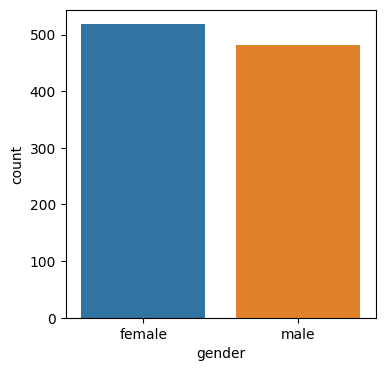

In [17]:
# Gender column

plt.figure(figsize=(4,4))
sns.countplot(data=df, x='gender')
plt.show()

#### `Interpretation: Female is more than male`

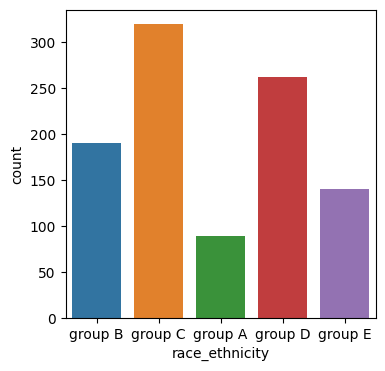

In [18]:
# Race_ethnicity column

plt.figure(figsize=(4,4))
sns.countplot(data=df, x='race_ethnicity')
plt.show()

#### Interpretation: In race_ethnicity column there are three group (group C > group D > group B) that are higher count compair to other group

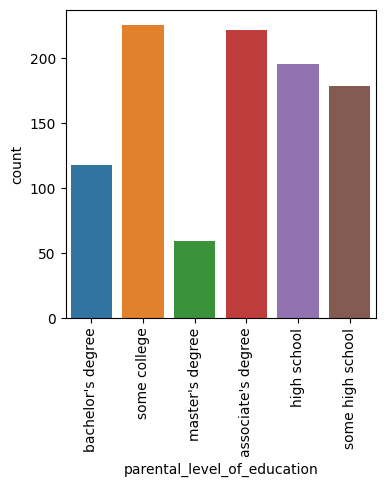

In [19]:
# parental_level_of_education columns

plt.figure(figsize=(4,4))
sns.countplot(data=df, x='parental_level_of_education')
plt.xticks(rotation=90)
plt.show()

#### Interpretation: As we can see from graph most of the parent education level is some college, associate's degree, high school, and some high school. there are less number of parents their education level is bachelor's degree and master's degree